<a href="https://colab.research.google.com/github/SAnand2903/BA830/blob/main/BA830_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\textbf{Clickbait or Connection? Cracking the Code of Likes on YouTube's Trending Page}$

Team 04: Atharva Lokhande, Pritam Pandit, Rishabh Anand, Saumya Anand

## Table of Contents

1. Problem Definition
2. Executive Summary
3. Motivation
4. Business Relevance
5. Data Source
6. Data cleaning and preparation
7. Exploratory Data Analysis
8. Clustering

  8.1 K- Means Clustering

  8.2 Hierarchical Clustering
9. Natural Language Processing
10.
11. Citations

## Problem Definition

The problem that we are trying to solve focuses on analyzing user interaction with YouTube trending
videos and what marks the trends apart from the most apparent factor, the channel size. We aim to utilize
metrics such as the number of views per video, likes/dislikes per video, comment count, tags (content
category relevance), and the demographics of the publisher and recommend expansive strategies for
YouTube content creators.

## Executive Summary

## Motivation

In today's booming YouTube landscape, where 122 million daily users tune in for everything from cat
videos to career-building content, understanding what makes videos truly go viral is no longer just about
entertainment – it's about unlocking immense potential. We can move beyond channel size by analyzing
user interaction with trending videos and delving into the deeper metrics that drive likes. This project isn't
just about cute animal compilations; it's about empowering businesses to connect with their audience,
creators to understand what resonates, and platforms to curate recommendations and combat
manipulation. Ultimately, it's about harnessing the power of YouTube to not only captivate viewers but
also build careers, foster communities, and pave the way for a new wave of online success.

## Data Source

## Business Relevance

YouTube isn't just cat videos anymore. With 122 million daily users, businesses are flocking to connect
with customers, while creators build careers from vlogs to tutorials. But what makes videos truly go viral?
This project ditches the fluff and analyzes what gets users to "like" beyond just channel size, be it targeted
ads, smarter creators, or thriving platforms. By employing machine learning tools, we aim to understand
how a business can thrive and excel on this platform and expand their customer base in an efficient
manner. We also want to propagate effective and ethical business expansion techniques that millions of
users can utilize to multiply their earnings using this platform.

## Data Cleaning and Preparation

In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=545be78e67ad532e5754c28b0503b91af90580386347cf0c7d1adcbc9ebf217a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [23]:
# Importing necessary libraries
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# Dataset url
url='https://raw.githubusercontent.com/SAnand2903/BA830/main/Data/youtube.csv'

In [10]:
# Reading the file
df=pd.read_csv(url)

In [11]:
# Exploring the initial few entries
df.head(5)

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [12]:
# Exploring null values, if any
df.isna().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [13]:
# Dropping columns video ID and index
df.drop(columns=['video_id', 'index'], inplace=True)

In [25]:
# Convert the date column to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%d/%m/%Y')

In [26]:
# Looking at the entries that belong to Canada
df.groupby('publish_country').get_group('CANADA')

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
120589,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-10-11,17:00 to 17:59,Friday,CANADA,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False
120590,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00 to 17:59,Monday,CANADA,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False
120591,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-12-11,19:00 to 19:59,Sunday,CANADA,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False
120592,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-12-11,18:00 to 18:59,Sunday,CANADA,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False
120593,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-09-11,11:00 to 11:59,Thursday,CANADA,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-11-06,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


In [ ]:
#from langdetect import detect
#from langdetect.lang_detect_exception import LangDetectException

#def detect_language(text):
#    try:
       # return detect(text)
#    except LangDetectException:
#        return 'unknown'

#english_titles = df[df['title'].apply(lambda x: detect_language(x) == 'en')]


In [27]:
# Using regex to only keep English titled values in the dataset and saving it in english_text_df
import re
def is_english(text):
    # Regular expression to match only English text
    return bool(re.match(r'^[a-zA-Z\s.,!?-]+$', text))

# Filter the DataFrame to include only English text
english_text_df = df[df['title'].apply(is_english)]


In [28]:
# Looking at the initial few entries of the enw dataset
english_text_df.head(5)

,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
13,17.14.11,Which Countries Are About To Collapse?,NowThis World,25,2017-12-11,14:00 to 14:59,Sunday,US,"nowthis|""nowthis world""""|""""world news""""|""""nowt...",544770,7848,1171,3981,False,False,False
14,17.14.11,SHOPPING FOR NEW FISH!!!,The king of DIY,15,2017-12-11,18:00 to 18:59,Sunday,US,"shopping for new fish|""new fish""""|""""aquarium f...",207532,7473,246,2120,False,False,False
15,17.14.11,The New SpotMini,BostonDynamics,28,2017-11-13,20:00 to 20:59,Monday,US,"Robots|""Boston Dynamics""""|""""SpotMini""""|""""Legge...",75752,9419,52,1230,False,False,False
16,17.14.11,One Change That Would Make Pacific Rim a Classic,Cracked,23,2017-12-11,17:00 to 17:59,Sunday,US,"pacific rim|""pacific rim 2""""|""""pacific rim seq...",295639,8011,638,1256,False,False,False


In [19]:
# Looking at the shape of the new datatset
english_text_df.shape

(35225, 16)

## Exploratory Data Analysis

Before plunging into the technical analysis of the dataset to derive insights, we would prefer to get an overview of the different factors play in this dataset.

First, we would like to analyze how `likes` behave during different timelines.

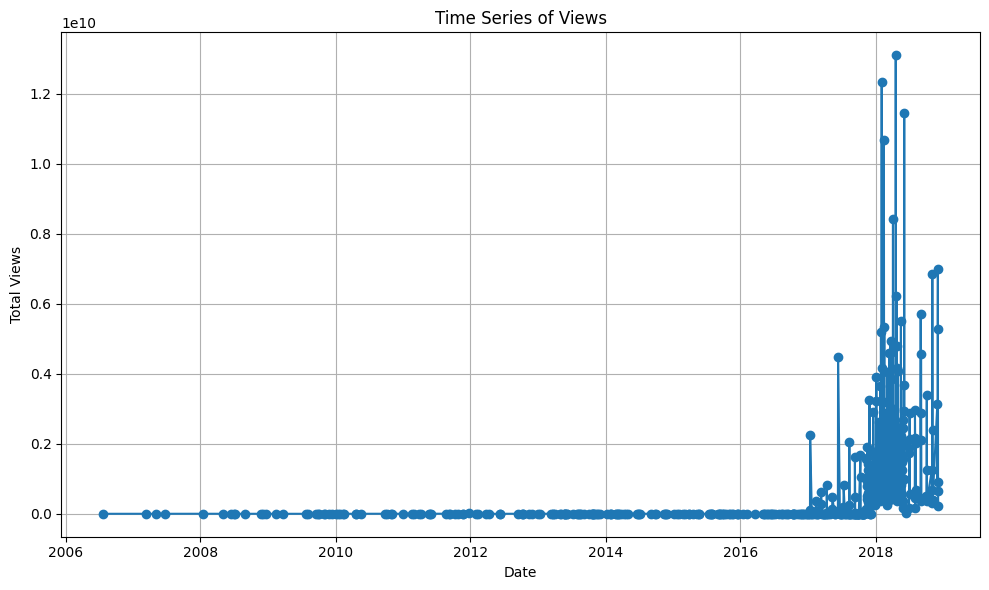

In [30]:
# Groupping by publish_date and sum the views for each date
views_by_date = df.groupby('publish_date')['views'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(views_by_date.index, views_by_date.values, marker='o', linestyle='-')
plt.title('Time Series of Views')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot, it can be seen that there is a substantial increase in the number of views in 2017-2018, as compared to 2006-2016. It could be said that was due to the heightened craze amongst people to use YouTube as an alternate source of income.

This particular tidbit of information is definitely worth looking into and therefore, we would like to make a timeseries plot that looks into the number of total views in different months on 2018 to see if the number of views were consistent throught the year.

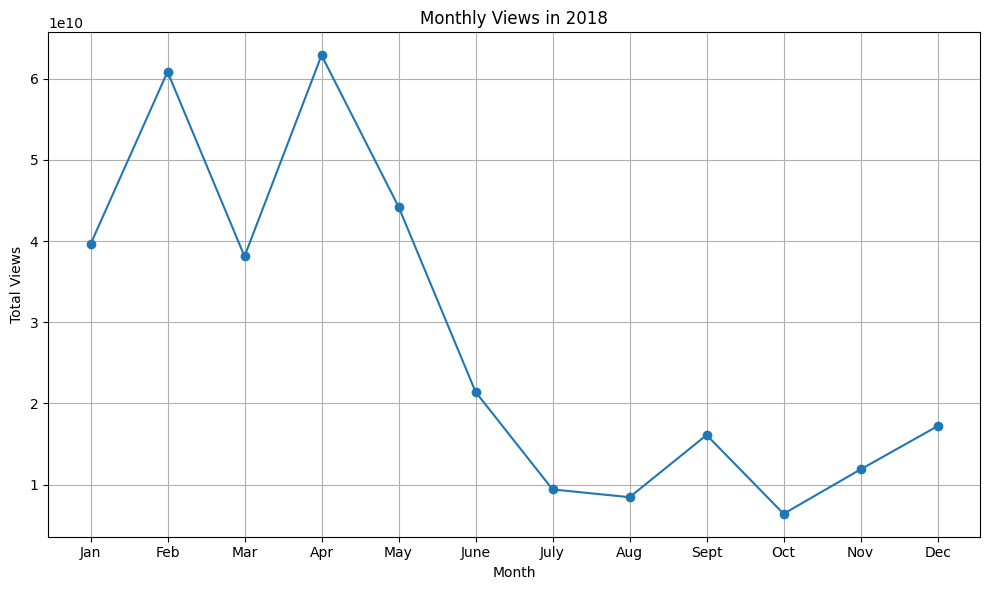

In [32]:
# Filter the DataFrame to include only the data for the year 2018
df_2018 = df[df['publish_date'].dt.year == 2018]

# Group by month and sum the views for each month
views_by_month = df_2018.groupby(df_2018['publish_date'].dt.month)['views'].sum()

# Plotting
plt.figure(figsize=(10, 6))
views_by_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Views in 2018')
plt.xlabel('Month')
plt.ylabel('Total Views')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot we can see that there hasn't been a consistent 'popularity' in terms of views, throughtout 2018. The beginning of 2018 definitely saw a huge spike in the total number of views but that dulled down towards the end of 2018.

## TO DO

In [ ]:
#TEST
#import pandas as pd
#import re
#def is_mostly_english(text):
    # This regex matches strings that consist mostly of ASCII characters
    #return re.match(r'^[A-Za-z0-9 \'"!@#$%^&*()_+={}\[\]:;<>,.?/~`-]+$', text) is not None

# Apply the function to filter out non-English titles
#english_titles = df[df['title'].apply(is_mostly_english)]

In [20]:
english_titles['trending_date'] = pd.to_datetime(english_titles['trending_date'], format='%y.%d.%m')

NameError: name 'english_titles' is not defined

In [ ]:
english_titles['publish_date'] = pd.to_datetime(english_titles['publish_date'])

In [ ]:
english_titles

In [ ]:
features = english_titles[['views', 'likes', 'comment_count', 'category_id','dislikes']]

Youtube Trending Videos solely depends on these features below. We are considering `Views` ,`Likes` ,`Comments count` ,`Category Id` and `Dislikes` as one of the main features.

In [21]:
num_clusters = 2

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized_data = sc.fit_transform(features)
normalized_data = pd.DataFrame(normalized_data, columns=features.columns)
normalized_data.head()

NameError: name 'features' is not defined

In [ ]:
import seaborn as sns
sns.heatmap(normalized_data.corr(), annot=True);

## Clustering

###KMeans Clustering


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5
kmeans_result = KMeans(num_clusters, init = 'random', random_state=42).fit(normalized_data)

In [ ]:
kmeans_result.cluster_centers_

In [ ]:
cluster_labels = kmeans_result.labels_
normalized_data['labels'] = cluster_labels
normalized_data

In [ ]:
normalized_data['labels'].value_counts()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(normalized_data, x='views', y='likes', z='comment_count',color = 'labels')
fig.update_traces(marker_size = 3)
fig.show()

$\textbf{Finding the optimal number of Clusters - Elbow Plot}$

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

max_clusters = 5
wcss = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.grid(True)
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
from scipy.cluster.vq import kmeans
import seaborn as sns
k_means_optimal=normalized_data.copy()
k_means_optimal = k_means_optimal[['views', 'likes', 'comment_count', 'category_id','dislikes']]

distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers, distortion = kmeans(k_means_optimal, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)

$\textbf{Determine optimal k using the silhouette method}$

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
X = k_means_optimal
silhouette_scores = []
range_values = range(2, 7)

for i in range_values:
    kmeans = KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, metric='euclidean'))

plt.plot(range_values, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

optimal_k = 2
model = KMeans(n_clusters=optimal_k, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

###Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
df_hierarchy = normalized_data.copy()
df_hierarchy

In [ ]:
sample_size = int(len(df_hierarchy) * 0.1)
df_sample = df_hierarchy.sample(n=sample_size, random_state=42)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_sample)
Z = linkage(df_reduced, method='single')

In [ ]:
num_clusters = range(2, 6)
silhouette_scores = []

for n_clusters in num_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_reduced, labels)
    silhouette_scores.append(silhouette_avg)
    print('Silhouette Score for', n_clusters, 'clusters is:', silhouette_avg)

In [ ]:
optimal_num_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print('Optimal Number of Clusters:', optimal_num_clusters)

In [ ]:
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical Clustering)')
plt.show()

##Natural Language Processing

Let us see if we have any sentiment words in the titles

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Function to get sentiment label
def sentiment_score(text):
  sentiment_scores = SIA.polarity_scores(text)
  if sentiment_scores['compound'] >= 0.05:
    return 'Positive'
  elif sentiment_scores['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

# Applying sentiment analysis to comment_text
english_text_df['Sentiment'] = english_text_df['title'].apply(sentiment_score)


<ipython-input-33-2cc657b57202>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_text_df['Sentiment'] = english_text_df['title'].apply(sentiment_score)


In [ ]:
X = english_text_df['Sentiment'].value_counts()

In [ ]:
X

Neutral     21343
Positive     7242
Negative     6640
Name: Sentiment, dtype: int64

In [ ]:
import plotly.express as px

# Create bar graph using Plotly Express

fig = px.bar(x=X.index, y=X, title='Youtube Video Title Sentiment Count', labels={'x': 'Number of titles', 'y': 'Title Sentiment'})

# Show plot
fig.show()

Lets see if we have any entity names in our video titles

In [ ]:
from collections import Counter
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Function to extract entities from text
def extract_entities_spacy(title):
  doc = nlp(title)
  return [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]

# Assuming data is loaded into a DataFrame named df
all_entities_spacy = english_text_df['title'].apply(extract_entities_spacy)


KeyboardInterrupt: 